# 파이썬을 이용한 로또 번호 분석

텀프로젝트_컴퓨터공학과_2023105650_문정환

## 주제선정이유

누구나 한번쯤은 '로또에 당첨되면 좋겠다'라는 생각을 해본적이 있을 것이다. 나 역시도 이러한 생각을 한 적이 있었고 어떻게 하면 당첨확률을 높일 수 있을까에 대해서 생각해본적도 있었다. 이번 기회에 파이썬을 이요한 데이터 분석을 통해서 그 실마리를 찾을 수 있지 않을까 하는 생각에 위와 같은 텀 프로젝트 주제를 선정하게 되었다.

## 가설 정의

#### 1. 당첨 번호에는 짝수와 홀수가 50%의 비율로 존재할 것이다.
로또의 당첨번호는 보너스 번호를 제외하고 모두 6개이고 이 숫자들 중 짝수와 홀수는 50% 정도의 비율로 분포할 것이다.

#### 2. 1-15, 16-30, 31-45의 구간의 숫자들이 33.3%의 비율로 분포할 것이다.
당첨번호는 1번부터 45번까지 총 45개의 숫자들 중 6개가 무작위로 선택된다.
따라서 1~45사이의 번호를 15개씩 한 구간으로 나누면 1-15, 16-30, 31-45의 세 구간으로 나눌 수 있고 이 구간들 사이에 존재하는 숫자들이 33.3%의 비율로 선택될 것이다.

#### 3. 이전 회차에 당첨된 번호는 바로 그 다음 회차에는 선택되지 않을 것이다.
한 회차에서 선택된 번호 6개는 바로 다음 회차에서 다시 당첨번호가 되지 않을 것이다.

## 획득한 데이터 및 가공

In [1]:
import pandas as pd

df = pd.read_csv("./로또번호_파일.csv",encoding='utf-8')
df = df[['Unnamed: 1','Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']]
df = df.loc[2:1068]
df


,Unnamed: 1,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
2,1067,7,10.0,19.0,23.0,28.0,33.0,18
3,1066,6,11.0,16.0,19.0,21.0,32.0,45
4,1065,3,18.0,19.0,23.0,32.0,45.0,24
5,1064,3,6.0,9.0,18.0,22.0,35.0,14
6,1063,3,6.0,22.0,23.0,24.0,38.0,30
...,...,...,...,...,...,...,...,...
1064,5,16,24.0,29.0,40.0,41.0,42.0,3
1065,4,14,27.0,30.0,31.0,40.0,42.0,2
1066,3,11,16.0,19.0,21.0,27.0,31.0,30
1067,2,9,13.0,21.0,25.0,32.0,42.0,2


로또6/45의 번호를 분석하기 위해서 그동안의 당첨 번호를 제공하는 '동행복권'이라는 사이트에서 1회 부터 1067회 까지의 당첨번호를 엑셀 파일로 다운받을 수 있었다.
다운 받은 링크는 별첨에 첨부한다. 
다운 받은 파일은 엑셀파일로 저장되어있었기 때문에 분석을 위하여 파일속성을 .csv파일로 변경하여 저장하였다.

위 표의 내용은 파이썬의 pandas라이브러리를 이용하여 로또번호_파일.csv를 불러왔고 당첨금액, 당첨인원등의 데이터 분석에 있어서 불필요한 요소를 배제히였다.

#### <columns에 대한 설명>

-Unnamed: 1 -> 로또 추첨의 각 회차번호를 의미한다.

-Unnamed: 13 ~ Unnamed: 18 -> 각 회차에서 추첨된 당첨 번호를 이다.

-Unnamed: 19 -> 각 회차에서 추첨된 보너스 번호를 의미한다.

In [2]:
df['Unnamed: 13'] = df['Unnamed: 13'].astype(float)
df

,Unnamed: 1,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
2,1067,7.0,10.0,19.0,23.0,28.0,33.0,18
3,1066,6.0,11.0,16.0,19.0,21.0,32.0,45
4,1065,3.0,18.0,19.0,23.0,32.0,45.0,24
5,1064,3.0,6.0,9.0,18.0,22.0,35.0,14
6,1063,3.0,6.0,22.0,23.0,24.0,38.0,30
...,...,...,...,...,...,...,...,...
1064,5,16.0,24.0,29.0,40.0,41.0,42.0,3
1065,4,14.0,27.0,30.0,31.0,40.0,42.0,2
1066,3,11.0,16.0,19.0,21.0,27.0,31.0,30
1067,2,9.0,13.0,21.0,25.0,32.0,42.0,2


맨 위의 데이터 프레임을 가지고 list를 만들어서 데이터 분석을 하려고 하였는데 당첨 번호들 중 첫번째 번호만 int type이고 나머지 번호들은 float type을 가지고 있었기 때문에 분석을 용이하게 하기 위해서 모두 float type으로 변경해주었다.

## 분석결과

### 가설 1 : 당첨 번호에는 짝수와 홀수가 50%의 비율로 존재할 것이다.

In [3]:
list_numbers = []
for i in range (0,1067):
    list_numbers.append(list(df.iloc[i,1:7]))
list_numbers

[[7.0, 10.0, 19.0, 23.0, 28.0, 33.0],
 [6.0, 11.0, 16.0, 19.0, 21.0, 32.0],
 [3.0, 18.0, 19.0, 23.0, 32.0, 45.0],
 [3.0, 6.0, 9.0, 18.0, 22.0, 35.0],
 [3.0, 6.0, 22.0, 23.0, 24.0, 38.0],
 [20.0, 31.0, 32.0, 40.0, 41.0, 45.0],
 [4.0, 24.0, 27.0, 35.0, 37.0, 45.0],
 [3.0, 10.0, 24.0, 33.0, 38.0, 45.0],
 [7.0, 10.0, 22.0, 25.0, 34.0, 40.0],
 [11.0, 23.0, 25.0, 30.0, 32.0, 40.0],
 [8.0, 13.0, 19.0, 27.0, 40.0, 45.0],
 [13.0, 20.0, 24.0, 32.0, 36.0, 45.0],
 [4.0, 7.0, 12.0, 14.0, 22.0, 33.0],
 [14.0, 19.0, 27.0, 28.0, 30.0, 45.0],
 [22.0, 26.0, 29.0, 30.0, 34.0, 45.0],
 [5.0, 17.0, 26.0, 27.0, 35.0, 38.0],
 [21.0, 26.0, 30.0, 32.0, 33.0, 35.0],
 [6.0, 12.0, 31.0, 35.0, 38.0, 43.0],
 [3.0, 5.0, 13.0, 20.0, 21.0, 37.0],
 [6.0, 12.0, 17.0, 21.0, 32.0, 39.0],
 [2.0, 20.0, 33.0, 40.0, 42.0, 44.0],
 [7.0, 16.0, 25.0, 29.0, 35.0, 36.0],
 [6.0, 14.0, 15.0, 19.0, 21.0, 41.0],
 [12.0, 17.0, 20.0, 26.0, 28.0, 36.0],
 [3.0, 5.0, 12.0, 22.0, 26.0, 31.0],
 [5.0, 14.0, 15.0, 23.0, 34.0, 43.0],
 [6.0, 7.0,

전체 데이터에서 보너스 번호를 제외한 로또 번호를 각 시행회차끼리 하나의 리스트로 묶어서 정리하였고, <br/>그 정보를 list_numbers라는 하나의 리스트로 정리하였다.

In [4]:
even = 0
odd = 0
for j in range (0,1067):
    for h in range (0,6):
        if list_numbers[j][h]%2==0:
            even += 1
        else :
            odd += 1

list_numbers의 데이터를 가지고 각 회차의 로또 번호를 하나씩 가져와서 이 번호가 홀수인지 짝수인지를 확인하고,<br>
번호가 홀수인 경우 odd라는 변수에 1점을 더하고, 짝수인 경우 even이라는 변수에 1점을 더해주는 코드를 만들었다.

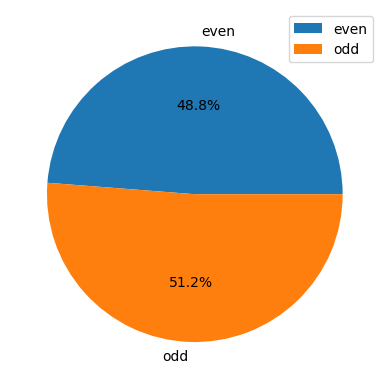

짝수의 개수 :3122 홀수의 개수 :3280


In [5]:
import matplotlib.pyplot as plt

even = 3122
odd = 3280

result = pd.DataFrame({'Numbers': [even, odd]},
                      index=['even', 'odd'])

result.plot.pie(y='Numbers', autopct='%1.1f%%')
plt.ylabel('')  # y축 레이블 제거
plt.show()

print(f'짝수의 개수 :{even}', f'홀수의 개수 :{odd}')

위 자료만으로는 가설1에 대해서 분석하는 것이 부족하다고 생각했기에 다른 방법을 추가로 적용해서 가설1을 검증하였다.<br>
각 회차에서 뽑힌 숫자 6개 중에서 짝수가 몇 퍼센트를 차지하고 있는지 분석하였고 그 결과를 딕셔너리로 정리하였다.

In [6]:
even_or_odd = dict()
     
def percentage_func(even_numbers, odd_numbers):
    return (even_numbers/(even_numbers+odd_numbers))
        
for i in range (0,1067):
    even_numbers = 0
    odd_numbers = 0
    result = 0
    for j in range (0,6):
        if list_numbers[i][j] % 2 == 0:
            even_numbers += 1
        else:
            odd_numbers += 1
        result = percentage_func(even_numbers,odd_numbers)
        round_num = str(1067 - i)
        even_or_odd[round_num] = result

even_or_odd
val = even_or_odd.values()

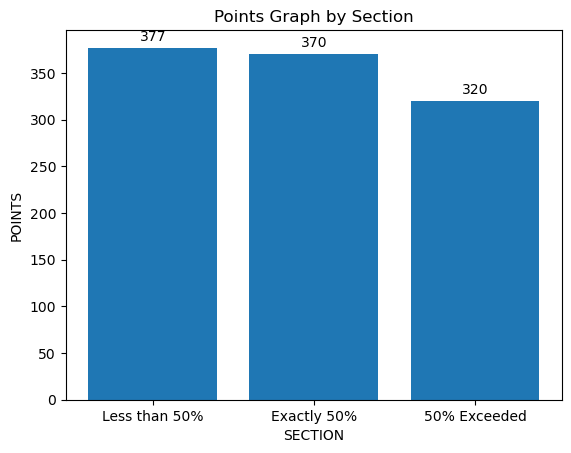

In [7]:
l = 0
m = 0
h = 0
val = list(val)

for i in range(1067):
    if val[i] == 0.5:
        m += 1
    elif val[i] < 0.5:
        l += 1
    elif val[i] > 0.5:
        h += 1

labels = ['Less than 50%', 'Exactly 50%', '50% Exceeded']
values = [l, m, h]

fig, ax = plt.subplots()
rects = ax.bar(labels, values)
plt.xlabel('SECTION')
plt.ylabel('POINTS')
plt.title('Points Graph by Section')


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

plt.show()

각 회차에서 추첨된 6개의 숫자중에서 짝수의 개수가 몇 퍼센트를 차지하고 있는지 분석하였고 그 결과를 이용하여 짝수의 비중이 50%미만인 경우, 정확히 50%인 경우, 50%초과인 경우로 나누어 그래프를 만들었다. 

위 그래프를 보면 총 1067회차 중에서 약 34.7%인 370회가 짝수와 홀수 50%씩 추첨된 것을 알 수 있다.

### 가설2 : 1-15, 16-30, 31-45의 구간의 숫자들이 33.3%의 비율로 분포할 것이다.


 1~15: 2133 
 16~30: 2105 
 31~45 2164


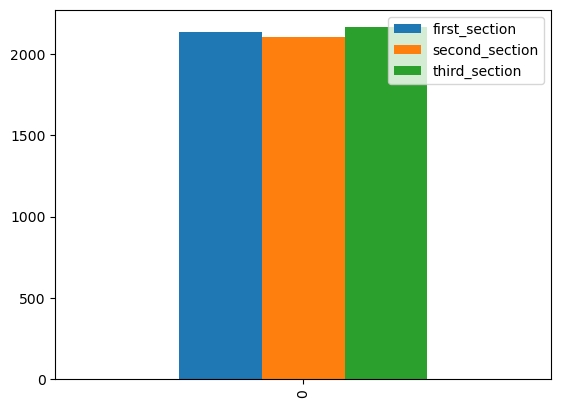

first_section 33.3 %
second_section 32.9 %
third_section 33.8 %


In [8]:
first_section=0
second_section=0
third_section=0

for i in range(1067):
    for j in range(6):
        if list_numbers[i][j]<16:
            first_section+=1
        elif list_numbers[i][j]>15 and list_numbers[i][j]<31:
            second_section+=1
        elif list_numbers[i][j]>30 and list_numbers[i][j]<46:
            third_section+=1

print("\n","1~15:",first_section,"\n","16~30:",second_section,"\n","31~45",third_section)

result_2=pd.DataFrame({"first_section":[first_section],"second_section":[second_section],"third_section":third_section})
result_2.plot.bar()
plt.show()

a=round((2133/6402)*100,1)
b=round((2105/6402)*100,1)
c=round((2164/6402)*100,1)
print("first_section",a,"%")
print("second_section",b,"%")
print("third_section",c,"%")

###  가설3 : 이전 회차에 당첨된 번호는 바로 그 다음 회차에는 선택되지 않을 것이다.

가설이 참인 경우: 5504개
가설이 거짓인 경우: 892개


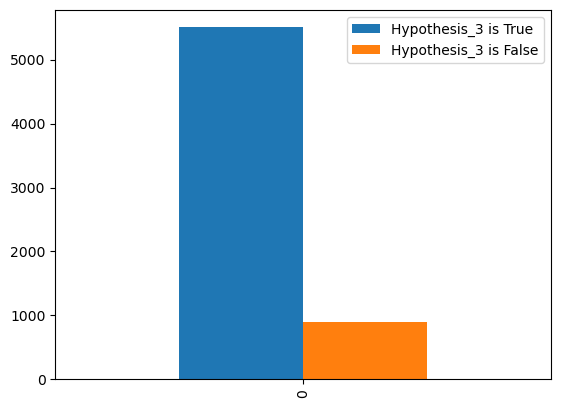

가설이 참인 경우 86.1 %


In [9]:
list_1=[]
list_2=[]
true = 0
false = 0

for i in range(1066):
    list_1=list_numbers[1066-i]
    list_2=list_numbers[1066-i-1]
    for j in range(0,6):
        if list_1[j] in list_2:
            false += 1
        else :
            true +=1
        
print(f"가설이 참인 경우: {true}개")
print(f"가설이 거짓인 경우: {false}개")

result_3 = pd.DataFrame({"Hypothesis_3 is True": [true], "Hypothesis_3 is False": [false]})
result_3.plot.bar()
plt.show()

a=round((5504/6396)*100,1)

print("가설이 참인 경우",a,"%")

\#가장 최근의 회차인 1067회차의 결과는 다음 회차와 비교할 수 없기 때문에 이를 제외하고 분석을 진행했다.


## 결론

### 가설 1
총 1067회차의 로또 번호 데이터를 가지고 분석해본 결과, 첫 번째 그래프에서 볼 수 있듯이 전체 로또 번호 중 약 48.8%가 짝수, 약 51.2%가 홀수인 것을 확인할 수 있었다.<br/>
그러나 두번째 그래프를 이용하여 각 회차별로 짝수와 홀수의 분포가 어떻게 되는지 분석한 결과 짝수와 홀수가 정확히 50% 씩 추첨된 회차는 전체 1067회차 중 370번에 불과했다.

따라서 전체적으로 추첨된 짝수와 홀수의 개수는 50%정도의 분포를 보이지만 각각의 회차에서는 약 35% 정도의 확률로 짝수와 홀수가 50%의 비율로 추첨된다는 것을 확인할 수 있었다.

### 가설2
각 회차의 번호들을 first_section : 1-15, second_section : 16-30, third_section : 31-45의 숫자구간으로 나누어서 각 구간에 해당하는 숫자가 있으면 각각의 변수에 1점씩을 추가하는 코드를 작성하였다.<br/>


그 결과 각 변수의 점수가 first_section = 2133, second_section = 2105, third_section = 2164 였다.<br/>
이를 백분율로 나타낸 결과 first_section : 33.3%, second_section : 32.9%, third_section : 33.8%로 분석결과가 가설을 지지한다는 것을 확인할 수 있었다.


### 가설3
전체 로또 추첨번호 중 가장 최근의 회차인 1067회차는 비교할 다음 회차가 존재하지 않기 때문에 이를 제외하고 분석을 진행하였다.<br/>
각 회차에서 추첨된 번호들이 다음 회차의 리스트에 있는 경우 false라는 변수에 1을 더하고, 다음 회차의 리스트에 없는 경우 true라는 변수에 1을 더하는 코드를 만들었다.<br/>

그 결과 전체 6396개의 추첨된 숫자들 중에서 892개의 숫자가 바로 다음 화차에 추첨되었고 5504개, 전체의 86.1%의 숫자가 다음회차에 추첨되지 않은 것을 확인할 수 있었다. 

## 참고문헌

1.Lecture11. Pandas (Data Analysis)_박상근 교수님<br/>
2. https://monand0603.tistory.com/31 <br/>
3. https://wikidocs.net/92114 <br/>
4. https://www.tutorialspoint.com/python-matplotlib-multiple-bars <br/>
5. https://goddaehee.tistory.com/307 <br/>
6. https://blockdmask.tistory.com/534

## 별첨


#### 데이터를 다운받은 링크주소
https://www.dhlottery.co.kr/gameResult.do?method=byWin

In [10]:
# 분석한 데이터의 원본파일

import pandas as pd

df = pd.read_csv("./로또번호_파일.csv",encoding='utf-8')
df

,회차별 추첨결과,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,년도,회차,추첨일,1등,NaN,2등,NaN,3등,NaN,4등,NaN,5등,NaN,당첨번호,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,1,2.0,3.0,4.0,5.0,6.0,보너스
2,2023,1067,2023.05.13,13,"1,981,114,010원",82,"52,346,509원","3,679","1,166,734원","163,488","50,000원","2,567,588","5,000원",7,10.0,19.0,23.0,28.0,33.0,18
3,NaN,1066,2023.05.06,15,"1,670,947,250원",88,"47,470,093원","3,323","1,257,108원","152,826","50,000원","2,432,046","5,000원",6,11.0,16.0,19.0,21.0,32.0,45
4,NaN,1065,2023.04.29,14,"1,852,593,938원",74,"58,415,125원","3,117","1,386,821원","148,561","50,000원","2,416,212","5,000원",3,18.0,19.0,23.0,32.0,45.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,NaN,5,2003.01.04,0,0원,0,0원,42,"6,033,800원","3,043","166,500원","60,434","10,000원",16,24.0,29.0,40.0,41.0,42.0,3
1065,2002,4,2002.12.28,0,0원,1,"211,191,200원",29,"7,282,400원","2,777","152,100원","52,382","10,000원",14,27.0,30.0,31.0,40.0,42.0,2
1066,NaN,3,2002.12.21,1,"2,000,000,000원",0,0원,139,"1,174,100원","5,940","54,900원","73,256","10,000원",11,16.0,19.0,21.0,27.0,31.0,30
1067,NaN,2,2002.12.14,1,"2,002,006,800원",2,"94,866,800원",103,"1,842,000원","3,763","100,800원","55,480","10,000원",9,13.0,21.0,25.0,32.0,42.0,2
